In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("./data/FISH.csv")
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size = 0.25, random_state = 4)
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

# 선형 회귀(linear regression)

- 피쳐를 가장 잘 표현하는 하나의 직선을 학습하는 알고리즘
- 장점
    - 계수들에 대해 해석이 간단
    - 학습과 예측 속도가 빠름
    - 회귀식이 만들어져서 예측이 어떻게 됐는지 쉽게 이해할 수 있음
    
- 단점
    - 데이터가 선형적이지 않을 경우 모델이 데이터에 적합하지 않을 수 있음
    - 이상치에 민감

In [4]:
lr = LinearRegression()

In [5]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [7]:
# 50cm 농어에 대한 예측
lr.predict([[50]])

array([1204.56473316])

- 선형회귀 모델이 찾은 가장 적합한 직선은 lr객체에 저장되어 있음

In [8]:
# 계수(coefficient), y절편
print(lr.coef_, lr.intercept_)

[36.7977512] -635.3228268277348


- 회귀식 : 36.8 * Length2 + (-635.32)
- coef_와 intercept_ 처첨 머신러닝이 찾은 값을 모델 파라미터(model parameter)라고 부름
- 즉, 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것
- 선형 회귀와 같이 모델 파라미터를 훈련하는 것을 **모델 기반 학습**이라고 하고, KNN과 같이 모델 파라미터가 없이 훈련 데이터를 저장하는 훈련 방법을 **사례 기반 학습**이라고 함

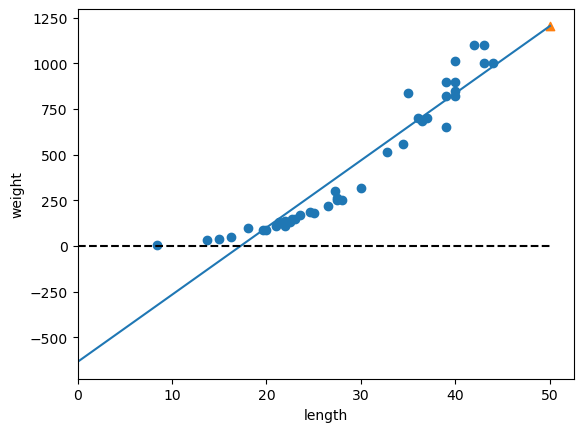

In [13]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train)
plt.plot([0, 50], [lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.plot([0, 50], [0, 0], "k--")
plt.scatter(50, 1205, marker = "^")
plt.xlim(0)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 평가

In [14]:
lr.score(x_test, y_test)

0.9316263284554744

In [15]:
pred = lr.predict(x_test)

In [16]:
mae = mean_absolute_error(y_test, pred)

In [17]:
mae

55.4767964020136

# 다항회귀

- 실제 농어의 무게는 일직선이라기보다는 왼쪽 위로 구부러진 곡선에 가깝기 때문에 직선보다는 곳건으로 예측하는 것이 더 적합
- 길이를 제곱한 항을 추가하여 2차 방정식의 그래프 형태로 학습

In [18]:
df["squared"] = df["Length2"] ** 2

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "squared"]], df["Weight"], test_size = 0.25, random_state = 4)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
lr.score(x_test, y_test)

0.9816215605279124

In [25]:
pred = lr.predict(x_test)

In [26]:
mae = mean_absolute_error(y_test, pred)

In [27]:
mae

25.57383238519944

In [32]:
lr.predict([[50, 2500]])

C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1581.53896459])

In [33]:
print(lr.coef_, lr.intercept_)

[-22.78530409   1.03559602] 131.8141108364003


- 회귀식 : -22,79 * Length2 + 1.04 * squared + 131.81

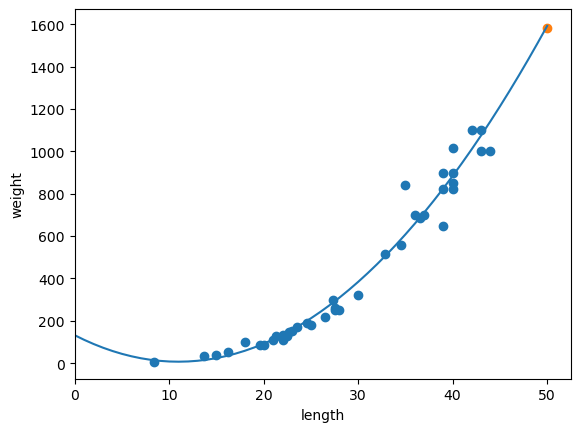

In [35]:
# 다항회귀 시각화
points = np.arange(0, 51)

plt.figure()

plt.scatter(x_train["Length2"], y_train)
plt.plot(points, -22.79*points + points**2*1.04 + 131.81)
plt.scatter(50, 1581.54)
plt.xlim(0)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()